In [0]:
import numpy as np 
import pandas as pd 

In [0]:
PATH = "/content/drive/My Drive/book_cover_data/title30/"
header = ["id", "file", "url", "title", "author","cat_id", "cat"]
df1 = pd.read_csv(PATH+"book30-listing-train.csv", names=header, encoding='latin1')
df2 = pd.read_csv(PATH+"book30-listing-test.csv", names=header, encoding='latin1')
df = pd.concat([df1, df2])
df_without_text = df.set_index("id")
df = df[["id", "url"]].set_index("id")


In [0]:
df100k_path = "/content/drive/My Drive/book_cover_data/book100k.csv"
df100k = pd.read_csv(df100k_path, header = 0, index_col = 0, encoding='latin1')
df100k = df100k[["id", "text"]].set_index("id")

In [0]:
df_text = pd.merge(left=df, right=df100k, left_on='id', right_on='id')
df_text.head()

,url,text
id,,
1446276082,http://ecx.images-amazon.com/images/I/51MGUKhk...,ENERGY SECURITY\nVOLUME I 6\nSAGE LIBRARY OF\n...
970096410,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks\nIdaho\nA Climber's Guide\nby Do...
1848291388,http://ecx.images-amazon.com/images/I/51Lpg7xm...,JOHN MARTIN\nLITTLEJOHN\nby John O'Brien\nAN E...
73402656,http://ecx.images-amazon.com/images/I/51WccSzF...,Silberberg\nCHEMISTRY\nThe Molecular Nature of...
323045979,http://ecx.images-amazon.com/images/I/51rJir5E...,Copntitd ineia\nSection One\nMosby's\nONCOLOGY...


In [0]:
ndf = df[~df.index.isin(df_text.index)]
ndf.shape

(30400, 1)

In [0]:
!pip install google.cloud.vision

  Using cached https://files.pythonhosted.org/packages/0d/7f/e10d602c2dc3f749f1b78377a3357790f1da71b28e7da9e5bc20b3a9bd40/google_cloud_vision-1.0.0-py2.py3-none-any.whl


In [0]:
import io
import os

# Imports the Google Cloud client library
import google.cloud.vision as vision
from google.cloud.vision import types
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r'/content/drive/My Drive/book_cover_data/title30/account_key.json'

In [0]:
client = vision.ImageAnnotatorClient()
image = vision.types.Image()
def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """    

    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    

    if response.error.message:
        return "Error"
    else:         
        text = texts[0].description if len(texts) != 0 else "Empty"
        return text

In [0]:
from csv import writer
 
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [0]:
uri = "http://ecx.images-amazon.com/images/I/51l6XIoa3rL.jpg"
print(detect_text_uri(uri))

Copyrighple Material
Gus Lee has written something special by bringing into focus the moral character,
example, and strength of one of America's greatest generals since WWII. General
Schwarzkopf's courage, love of his soldiers, energy, and infectious spirit will be
forever remembered as an example of selfless and effective military service, and
Gus Lee has captured that well in this touching book.
-GEN. BARRY R. MCCAFFREY, USA RET.
Schwärzkopf
WITH
Life
Lessons
of The BEAR
by GUS LEE
Best-selling author of
Courage: The Backbone of Leadership



In [0]:
urls = ndf.url
print(urls[0])

http://ecx.images-amazon.com/images/I/51l6XIoa3rL.jpg


In [0]:
def get_title(i):
  try:
    text = detect_text_uri(urls[i])
  except:
    text = "error"
  append_list_as_row(file_path, [urls.index[i], text])
  

In [0]:
from tqdm import trange
from joblib import Parallel, delayed
import multiprocessing
from multiprocessing import Pool
PATH2 = PATH+"bc_text/"
print(PATH2)

/content/drive/My Drive/book_cover_data/title30/bc_text/


In [0]:
for i in range(1,31):
  file_no = i * 1000   
  start = file_no - 1000
  end = file_no
  file_path = PATH2+"bc_text"+str(file_no)+".csv"
  new_df = pd.DataFrame()
  new_df.to_csv(file_path, index_label=["id","text"])
  with Pool(4) as p:
    p.map(get_title,trange(start, end))

100%|██████████| 1000/1000 [00:00<00:00, 190261.01it/s]


In [0]:
file_no = 31000
file_path = PATH2+"bc_text"+str(file_no)+".csv"
new_df = pd.DataFrame()
new_df.to_csv(file_path, index_label=["id","text"])
with Pool(4) as p:
  p.map(get_title,trange(30000, 30400))

100%|██████████| 400/400 [00:00<00:00, 221715.55it/s]


In [0]:
tdf = pd.read_csv(PATH2+"bc_text1000.csv", header = 0, index_col = 0, encoding='latin1')
for i in range(2,32):
  file_no = i * 1000  
  file_path = PATH2+"bc_text"+str(file_no)+".csv"
  tdf2 = pd.read_csv(file_path, header = 0, index_col = 0, encoding='latin1')
  tdf = pd.concat([tdf, tdf2])

In [0]:
tdf1 = tdf
tdf2 = df_text[["text"]]
tdf = pd.concat([tdf1, tdf2])

In [0]:
df_final = pd.merge(left=df_without_text, right=tdf, left_on='id', right_on='id')
df_final.shape

(57000, 7)

In [0]:
df_final.head()

,file,url,title,author,cat_id,cat,text
id,,,,,,,
1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs,Copyrighple Material\nGus Lee has written some...
1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books,Magnets\nPulling Together\nPushing Apart\nWrit...
1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation,ENERGY SECURITY\nVOLUME I 6\nSAGE LIBRARY OF\n...
1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles,AUDIOB OOK\nMP3-CD\nInsert Transfer Listen!\n-...
970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors,City of Rocks\nIdaho\nA Climber's Guide\nby Do...


In [0]:
df_final.groupby(["cat","cat_id"]).size()

cat                           cat_id
Arts & Photography            0         1900
Biographies & Memoirs         1         1900
Business & Money              2         1900
Calendars                     3         1900
Children's Books              4         1900
Christian Books & Bibles      9         1900
Comics & Graphic Novels       5         1900
Computers & Technology        6         1900
Cookbooks, Food & Wine        7         1900
Crafts, Hobbies & Home        8         1900
Engineering & Transportation  10        1900
Health, Fitness & Dieting     11        1900
History                       12        1900
Humor & Entertainment         13        1900
Law                           14        1900
Literature & Fiction          15        1900
Medical Books                 16        1900
Mystery, Thriller & Suspense  17        1900
Parenting & Relationships     18        1900
Politics & Social Sciences    19        1900
Reference                     20        1900
Religion & Spiritu

In [0]:
df_final.to_csv(PATH+"book30-listing-all-text.csv", index=True)

In [0]:
df_final = pd.read_csv(PATH+"book30-listing-all-text.csv", index_col = 0, encoding='latin1')


In [0]:
df_final_er = df_final[df_final.text=="Error"]
df_final_er

,file,url,title,author,cat_id,cat,text
id,,,,,,,


In [0]:
df_final.url["B00XIZWWNC"]

'http://ecx.images-amazon.com/images/I/D1z1%2BA3GTWS.png'

In [0]:
detect_text_uri("http://ecx.images-amazon.com/images/I/D1z1%2BA3GTWS.png")

'Error'

In [0]:
er_dict = {}
for ins in df_final_er.index:
  er_dict[ins] = detect_text_uri(df_final.url[ins])

In [0]:
er_dict

{'013118024X': 'WORKBOOK FOR\nfona-Tim Cat\nNURSING ASSISTANT\n',
 '1421420171': 'THE ANNOTATED TEXT\nTHE\nPOEMS\nOF\nT.S.\nELIOT\nVOLUME I\nCOLLECTED & UNCOLLECTED POEMS\n',
 '1618371851': 'Copyrighted Material\nHouseBeautiful\nRNK\nLISA GREGAN\nTMighte Ma\n',
 '851996884': 'Quality Control\nand Production\nof Biological\nControl Agents\nTheory and\nTesting Procedures\nEdited by\nJ.C. van Lenteren\nCABI Publishing\n',
 'B00XIZWWNC': 'Error'}

In [0]:
df_final.text["851996884"] = "Quality Control\nand Production\nof Biological\nControl Agents\nTheory and\nTesting Procedures\nEdited by\nJ.C. van Lenteren\nCABI Publishing\n"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_final.text["B00XIZWWNC"]

'CAST IRON Cook Book Vol. 1 Breakfast Recipies Charity Wilson'

Display Image

In [0]:
from IPython.display import Image,display
from IPython.core.display import HTML 

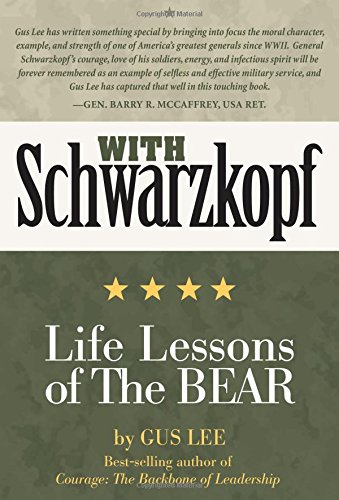

In [4]:
Image("http://ecx.images-amazon.com/images/I/51l6XIoa3rL.jpg")

In [5]:
df = df1
df1.groupby(["cat","cat_id"]).size()

cat                           cat_id
Arts & Photography            0         1710
Biographies & Memoirs         1         1710
Business & Money              2         1710
Calendars                     3         1710
Children's Books              4         1710
Christian Books & Bibles      9         1710
Comics & Graphic Novels       5         1710
Computers & Technology        6         1710
Cookbooks, Food & Wine        7         1710
Crafts, Hobbies & Home        8         1710
Engineering & Transportation  10        1710
Health, Fitness & Dieting     11        1710
History                       12        1710
Humor & Entertainment         13        1710
Law                           14        1710
Literature & Fiction          15        1710
Medical Books                 16        1710
Mystery, Thriller & Suspense  17        1710
Parenting & Relationships     18        1710
Politics & Social Sciences    19        1710
Reference                     20        1710
Religion & Spiritu

In [0]:
outdoor = df[df.cat_id==12].reset_index().url
travel = df[df.cat_id==1].reset_index().url

In [18]:
for i in range(100, 120):
  display(Image(outdoor[i]))
  print("history")
  display(Image(travel[i]))
  print("biography")

Output hidden; open in https://colab.research.google.com to view.

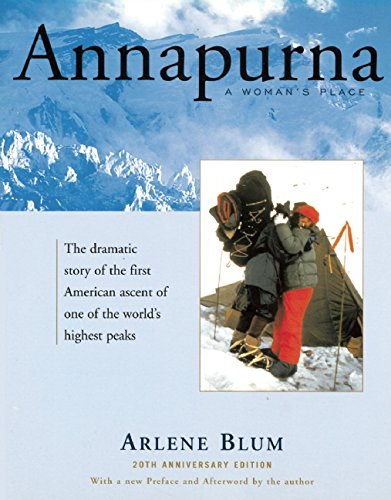

In [14]:
display(Image(outdoor[100]))